In [1]:
#Q1
import matplotlib.pyplot as plt
import numpy as np
import math

def equalSpace(lowerBound, upperBound, n):
    length = upperBound - lowerBound
    interval = length/n
    x_values = np.linspace(lowerBound, upperBound, n)
    return x_values

def Yvalues(function, x_values):
    y_values = []
    for i in range(len(x_values)):
        y_values.append(function(x_values[i]))
    return y_values

def Lnf(x_values, y_values):
    def lag(x):
        func = 0
        for n in range(len(x_values)):
            i = x_values[n]
            term = y_values[n]
            for m in range(len(x_values)):
                j = x_values[m]
                if j != i:
                    term *= (x-j)
                    term /= (i-j)
            func += term
        return func
    return lag

def lagrange(function, lowerBound, upperBound, n, x_func):
    x_values = x_func(lowerBound, upperBound, n)
    y_values = Yvalues(function, x_values)
    return Lnf(x_values, y_values)

def plot(func, funcName, lowerBound, upperBound):
    x = np.linspace(lowerBound, upperBound)
    y = []
    for i in x:
        y.append(func(i))
    
    plt.plot(x, y, color='blue')
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title(funcName)
    plt.grid(True)
    plt.show()


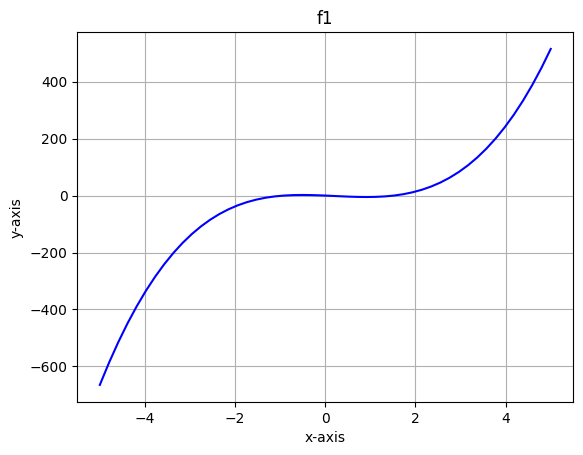

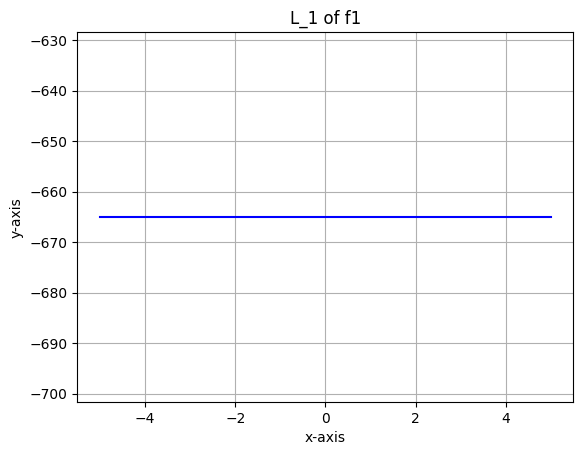

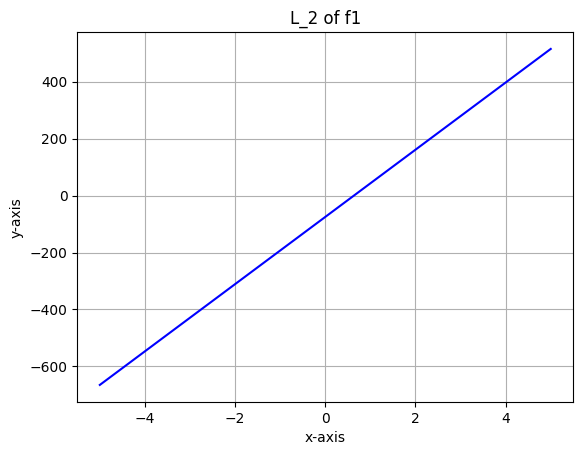

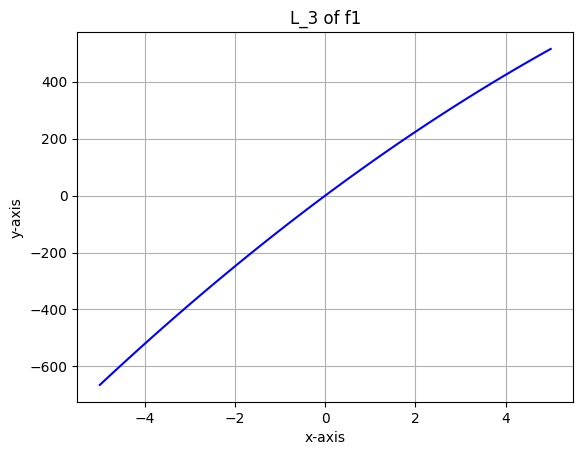

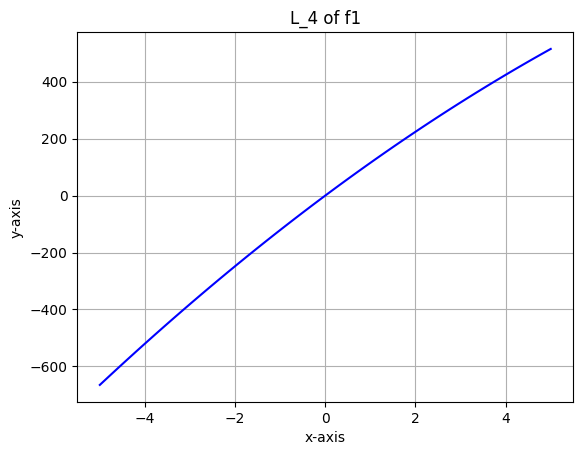

In [2]:
#Q1 demonstration
def f1(x):
    return (5 * math.pow(x,3) - 3 * math.pow(x, 2) - 7 * x)

def f2(x):
    return math.sin(x) * x - x

def f3(x):
    return math.tan(math.sin(x))

f1_L1 = lagrange(f1, -5, 5, 1, equalSpace)
f1_L2 = lagrange(f1, -5, 5, 2, equalSpace)
f1_L3 = lagrange(f1, -5, 5, 3, equalSpace)
f1_L4 = lagrange(f1, -5, 5, 4, equalSpace)
plot(f1, "f1", -5, 5)
plot(f1_L1, "L_1 of f1", -5, 5)
plot(f1_L2, "L_2 of f1", -5, 5)
plot(f1_L3, "L_3 of f1", -5, 5)
plot(f1_L3, "L_4 of f1", -5, 5)

In [3]:
#Q2:
def findError(func, lowerBound, upperBound, n, x_func):
    x = np.linspace(lowerBound, upperBound, 1000)
    lag = lagrange(func, lowerBound, upperBound, n, x_func)

    error = []
    for i in x:
        error.append(abs(func(i) - lag(i)))
        
    return max(error)

findError(f2, -10, 10, 10, equalSpace)

np.float64(12.569801566839509)

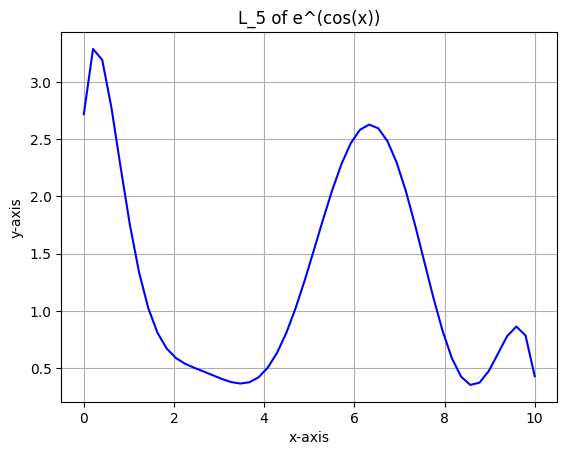

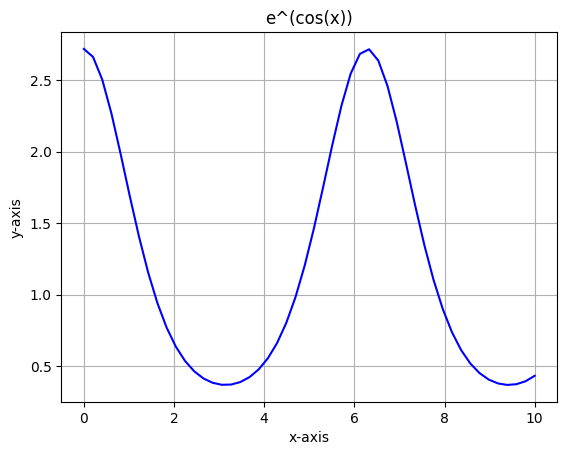

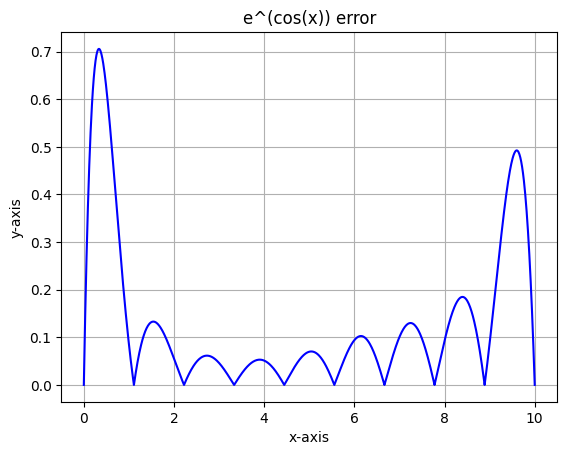

In [4]:
#Q3:
def f(x):
    return math.exp(math.cos(x))

f_L5 = lagrange(f, 0, 10, 10, equalSpace)
plot(f_L5, "L_5 of e^(cos(x))", 0, 10)
plot(f, "e^(cos(x))", 0, 10)

def plotError(func, funcName, lowerBound, upperBound, n, x_func):
    x = np.linspace(lowerBound, upperBound, 1000)
    lag = lagrange(func, lowerBound, upperBound, n, x_func)

    y = []
    for i in x:
        y.append(abs(func(i) - lag(i)))

    plt.plot(x, y, color='blue')
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title(funcName + " error")
    plt.grid(True)
    plt.show()
plotError(f, "e^(cos(x))", 0, 10, 10, equalSpace)

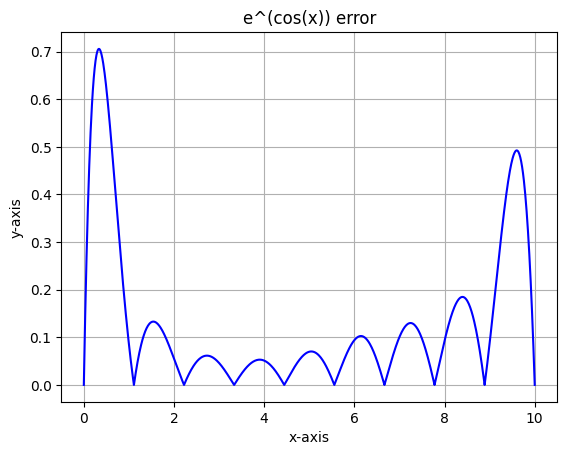

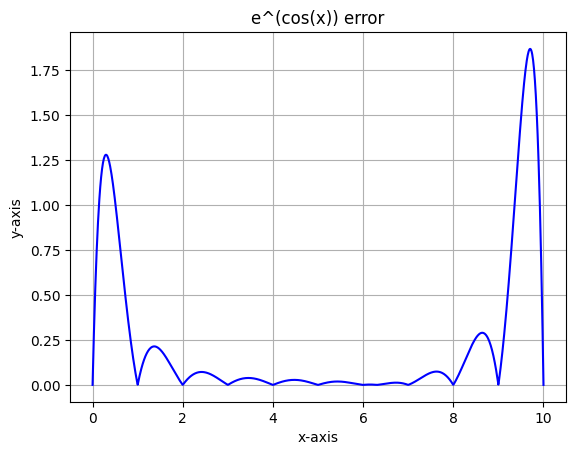

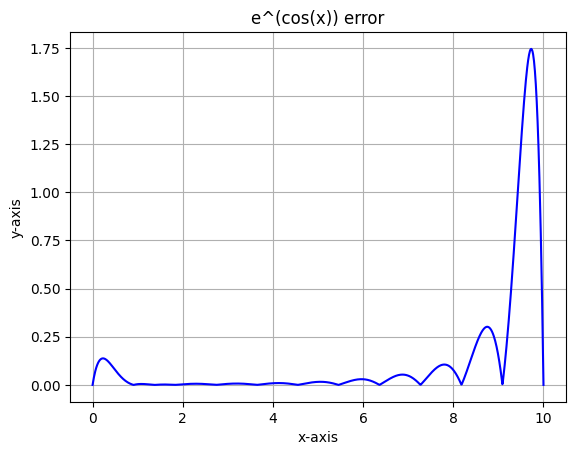

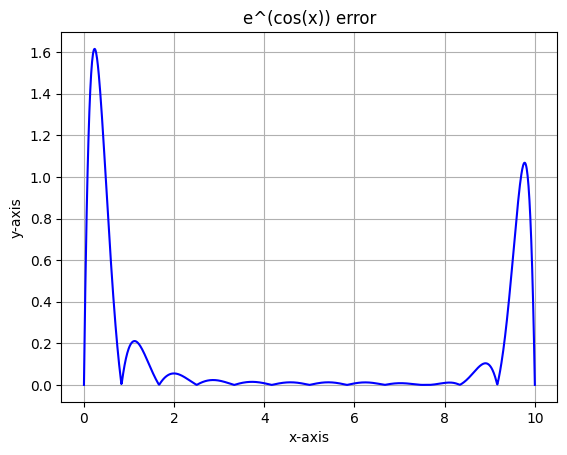

In [34]:
#Q4:
def runge(x):
    return 1/(1 + 25 * math.pow(x, 2))

plotError(f, "e^(cos(x))", 0, 10, 10, equalSpace)
plotError(f, "e^(cos(x))", 0, 10, 11, equalSpace)
plotError(f, "e^(cos(x))", 0, 10, 12, equalSpace)
plotError(f, "e^(cos(x))", 0, 10, 13, equalSpace)

So as demonstrated by the function, the error actually goes up with higher degrees. This error magnifies near the end of the interpolation points.

In [6]:
#Q5:
def chebyshev(lowerBound, upperBound, n):
    nodes = []
    for k in range(n):
        x_k = math.cos(((k + 0.5) * math.pi) / n)
        a = 0.5 * (lowerBound + upperBound) + 0.5 * (upperBound - lowerBound) * x_k
        nodes.append(a)
    return np.sort(nodes)
                     
def chebyshev2(lowerBound, upperBound, n):
    nodes = []
    for k in range(n):
        x_k = math.cos((k * math.pi) / n)
        node = 0.5 * (lowerBound + upperBound) + 0.5 * (upperBound - lowerBound) * x_k
        nodes.append(node)
    return np.sort(nodes)

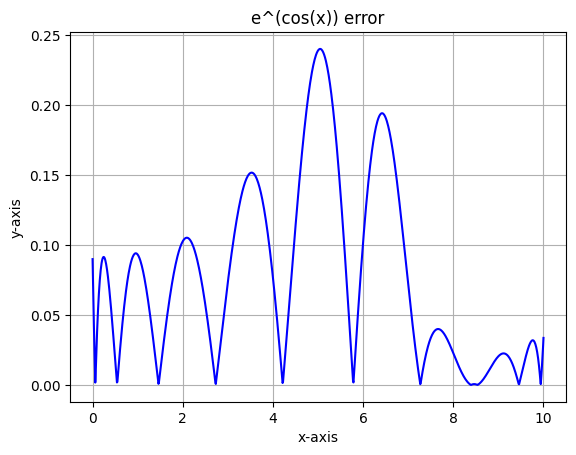

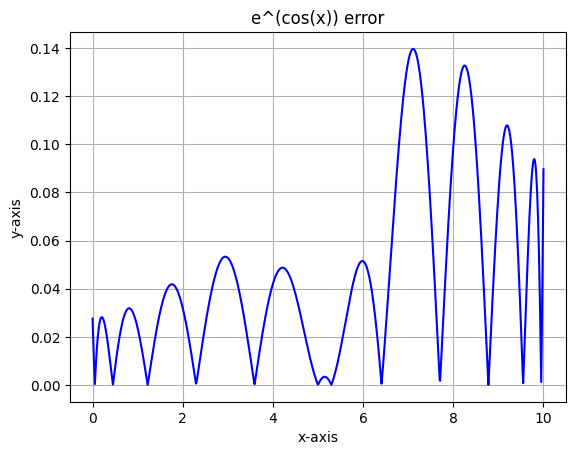

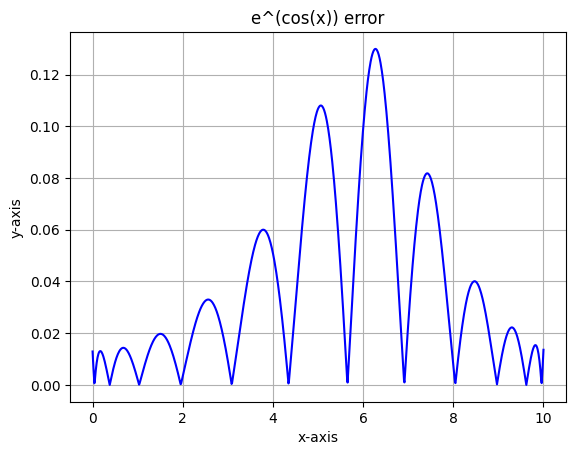

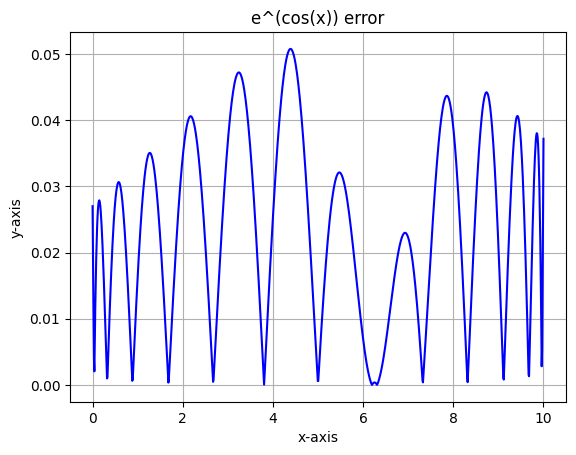

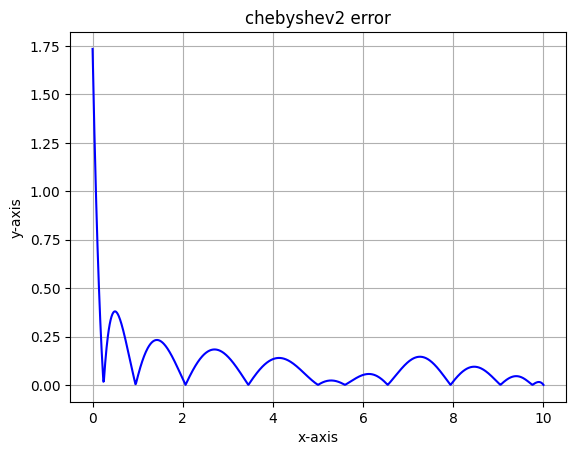

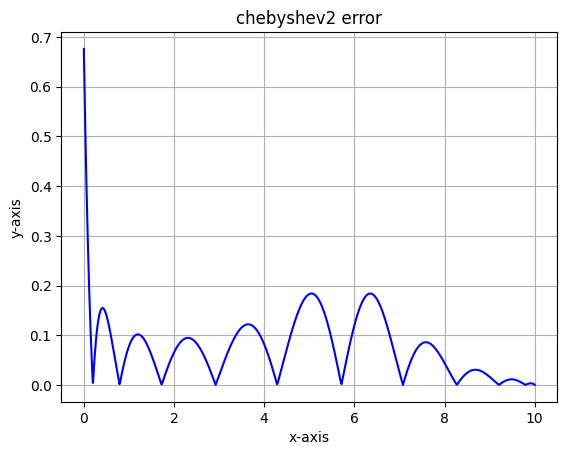

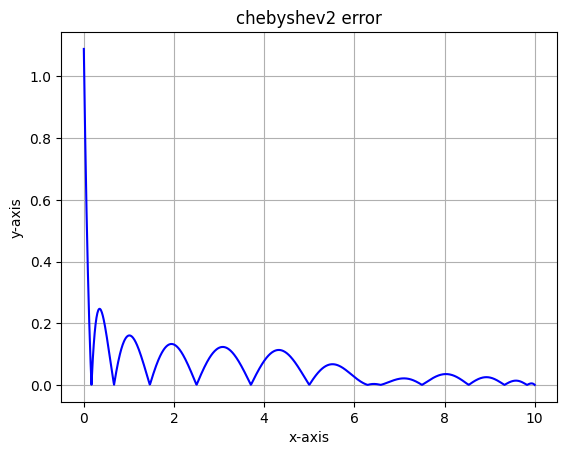

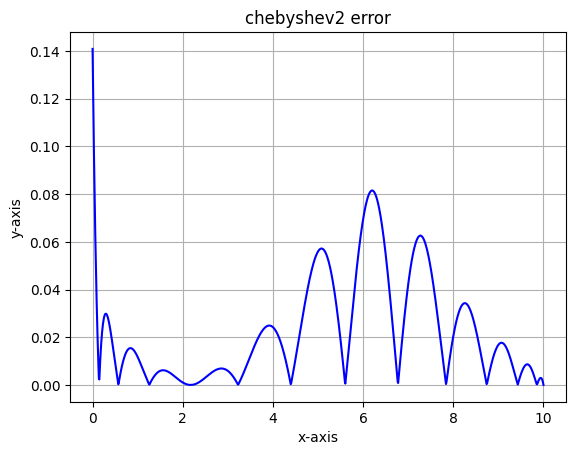

In [7]:
plotError(f, "e^(cos(x))", 0, 10, 10, chebyshev)
plotError(f, "e^(cos(x))", 0, 10, 11, chebyshev)
plotError(f, "e^(cos(x))", 0, 10, 12, chebyshev)
plotError(f, "e^(cos(x))", 0, 10, 13, chebyshev)

plotError(f, "chebyshev2", 0, 10, 10, chebyshev2)
plotError(f, "chebyshev2", 0, 10, 11, chebyshev2)
plotError(f, "chebyshev2", 0, 10, 12, chebyshev2)
plotError(f, "chebyshev2", 0, 10, 13, chebyshev2)

In [29]:
#Q6:
def linearInterpolation(x_values, y_values):
    def LI(x):
        for i in range(len(x_values) - 1):
            if x == x_values[i]:
                return y_values[i]
                
            elif x_values[i] <= x < x_values[i+1]:
                # print(str(x)+" "+str(x_values[i]))
                x0 = x_values[i]
                y0 = y_values[i]
                x1 = x_values[i+1]
                y1 = y_values[i+1]
                
                y = y0 + (y1 - y0) * ((x - x0) / (x1 - x0))
                return y
        if x == x_values[-1]:
            return y_values[-1]
    return LI

def linInt(function, lowerBound, upperBound, n, x_func):
    x_values = x_func(lowerBound, upperBound, n)
    y_values = Yvalues(function, x_values)

    return linearInterpolation(x_values, y_values)

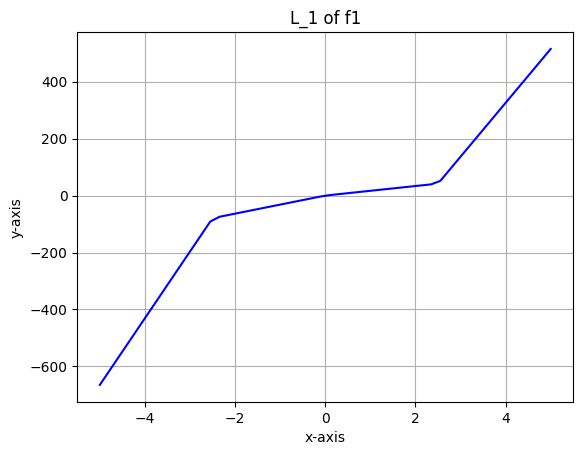

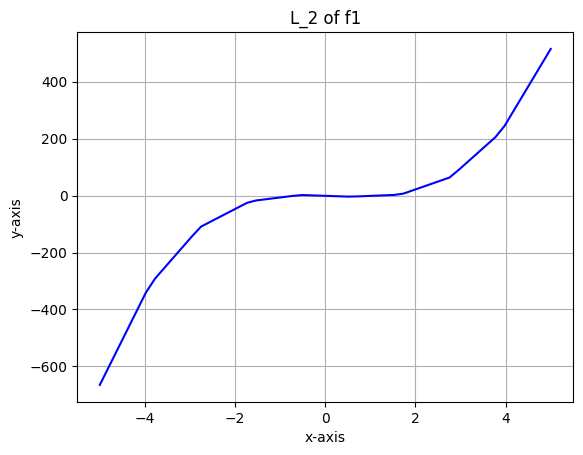

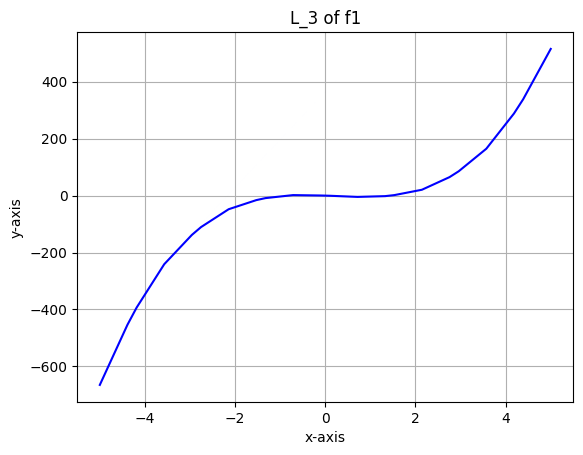

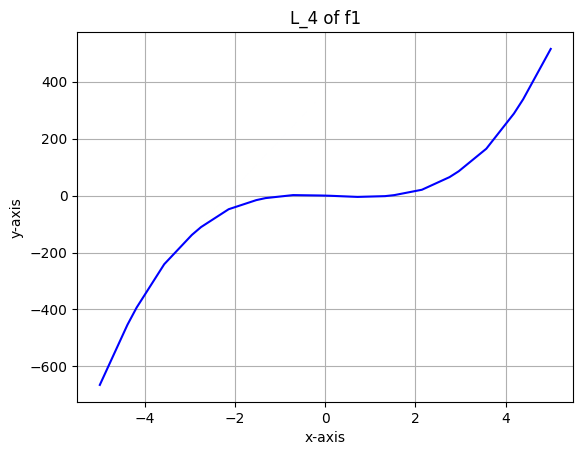

In [37]:
f1_L1 = linInt(f1, -5, 5, 5, equalSpace)
f1_L2 = linInt(f1, -5, 5, 10, equalSpace)
f1_L3 = linInt(f1, -5, 5, 15, equalSpace)
f1_L4 = linInt(f1, -5, 5, 20, equalSpace)
plot(f1_L1, "L_1 of f1", -5, 5)
plot(f1_L2, "L_2 of f1", -5, 5)
plot(f1_L3, "L_3 of f1", -5, 5)
plot(f1_L3, "L_4 of f1", -5, 5)

In [35]:
def quadratic_interpolation(x_values, y_values):
    N = len(x_values)
    
    coefficients = []
    for i in range(1, N - 1):
        x_prev, y_prev = x_values[i-1], y_values[i-1]
        x_curr, y_curr = x_values[i], y_values[i]
        x_next, y_next = x_values[i+1], y_values[i+1]
        
        A = np.array([[x_prev**2, x_prev, 1], [x_curr**2, x_curr, 1], [x_next**2, x_next, 1]])
        B = np.array([y_prev, y_curr, y_next])

        a, b, c = np.linalg.solve(A, B)
        coefficients.append({
            'a': a, 
            'b': b, 
            'c': c,
            'x_start': x_curr, 
            'x_end': x_next
        })

    def QI(x):
        if x_values[0] <= x < x_values[1]:
            segment = coefficients[0]
            a, b, c = segment['a'], segment['b'], segment['c']
            return a * x**2 + b * x + c

        for segment in coefficients:
            x_start = segment['x_start']
            x_end = segment['x_end']
            
            if x_start <= x <= x_end:
                a, b, c = segment['a'], segment['b'], segment['c']
                return a * x**2 + b * x + c
        
        if x == x_values[-1]:
            return y_values[-1]
            
    return QI

def quadInt(function, lowerBound, upperBound, n, x_func):
    x_values = x_func(lowerBound, upperBound, n)
    y_values = Yvalues(function, x_values)

    return quadratic_interpolation(x_values, y_values)

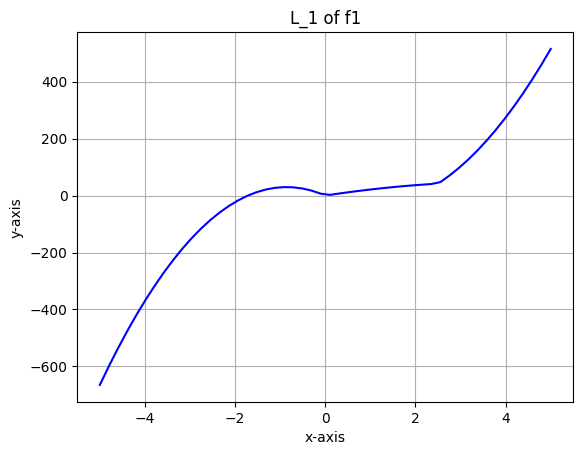

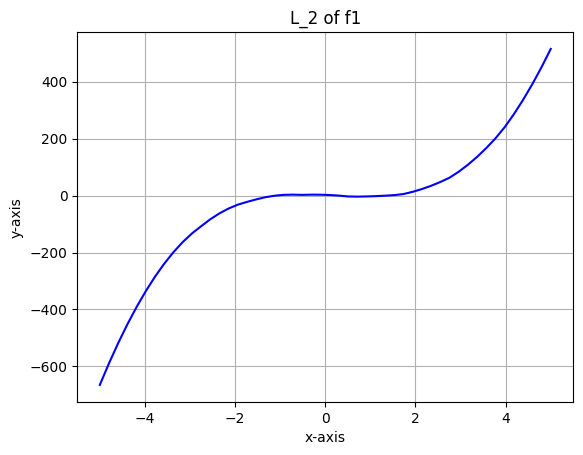

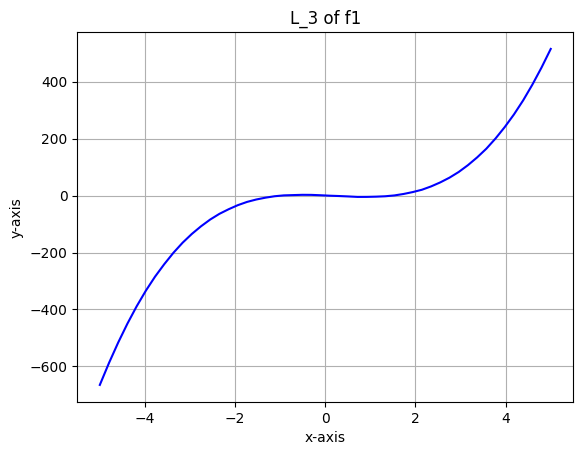

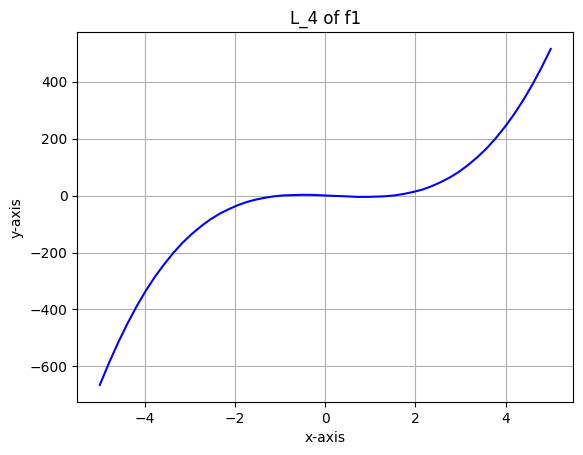

In [36]:
f1_L1 = quadInt(f1, -5, 5, 5, equalSpace)
f1_L2 = quadInt(f1, -5, 5, 10, equalSpace)
f1_L3 = quadInt(f1, -5, 5, 15, equalSpace)
f1_L4 = quadInt(f1, -5, 5, 20, equalSpace)
plot(f1_L1, "L_1 of f1", -5, 5)
plot(f1_L2, "L_2 of f1", -5, 5)
plot(f1_L3, "L_3 of f1", -5, 5)
plot(f1_L3, "L_4 of f1", -5, 5)